## Monty Hall game

Step 1: What to Simulate  
Step 2: Simulating one play   
Step 3: Simulating many plays  
Step 4: Visualizing results

In [148]:
# Step 1: What to Simulate

# we need to keep track of what is behind each of the doors
# the one the contestant first picks: guessed
# the one that Monty opens: revealed
# the remaining door: remaining

In [149]:
# first, let us build a function that, given one goat, returns the other goat

In [181]:
goats = ['goat one', 'goat two']    

In [182]:
def other_goat(x):
    if x == 'goat one':
        return 'goat two'
    if x == 'goat two':
        return 'goat one'

In [183]:
other_goat(x='goat one')

'goat two'

In [184]:
other_goat('goat two')

'goat one'

In [185]:
outcome = other_goat('goat one')

In [186]:
outcome

'goat two'

In [187]:
# to make a random choice of an element in a list, use np.random.choice

In [188]:
import numpy as np

In [189]:
np.random.choice(goats)

'goat one'

In [191]:
# Step 2: Simulating one play 

# there are three things to keep track of
# guess
# revealed
# remaining

hidden_behind_doors = ['car', 'goat one', 'goat two']

In [192]:
guessed = np.random.choice(hidden_behind_doors)

print(guessed)

# there are two cases to consider
if 'goat' in guessed:
    revealed = other_goat(guessed)
    print('guess: ', guessed, 'revealed: ', revealed)

if guessed == 'car':
    revealed = np.random.choice(goats)
    print('guess: ', guessed, 'revealed: ', revealed)

car
guess:  car revealed:  goat two


In [193]:
# now we wrap all this in a function

def monty_hall_game(x, y):
    '''
    this function simulates one game
    
    Arguments
    x: list of what is behind the doors
    y: list of the less desirable prizes
    
    Returns
    [guessed, revealed, returned]
    '''
    
    guessed = np.random.choice(x)
    
    if 'goat' in guessed:
        revealed = other_goat(guessed)
        remaining = 'car'
        
        return [guessed, revealed, remaining]
    
    if guessed == 'car':
        revealed = np.random.choice(y)
        remaining = other_goat(revealed)
        
        return [guessed, revealed, remaining]

In [194]:
monty_hall_game(hidden_behind_doors, goats)

['goat two', 'goat one', 'car']

In [195]:
monty_hall_game(hidden_behind_doors, goats)

['car', 'goat one', 'goat two']

In [196]:
monty_hall_game(hidden_behind_doors, goats)

['goat two', 'goat one', 'car']

In [ ]:
# Step 3: Simulating many plays

In [209]:
for i in range(number_of_plays):
    results.append(monty_hall_game(hidden_behind_doors, goats))

results_arr = np.array(results)

results_arr[:, 0] == hidden

array([False,  True, False, ..., False, False, False])

In [210]:
# summing over booleans
sum(results_arr[:, 0] == hidden)

10025

In [216]:
# doing the counting with lists (several lines)
counts = []
for hidden in hidden_behind_doors:
    count = sum(results_arr[:, 0] == hidden)
    counts.append(count)
print(counts)

[9942, 10033, 10025]


In [217]:
# doing the counting with list comprehension (one lines)

[sum(results_arr[:, 0] == hidden) for hidden in hidden_behind_doors]

[9942, 10033, 10025]

In [218]:
# wrapping it all in a function

def simulation(number_of_plays):
    results = []
    hidden_behind_doors = ['car', 'goat one', 'goat two']
    goats = ['goat one', 'goat two']

    for i in range(number_of_plays):
        results.append(monty_hall_game(hidden_behind_doors, goats))

    results_arr = np.array(results)
    
    # taking advatage of boolean representation as 0 and 1
    # and using list comprehension
    guessed_counts = [sum(results_arr[:, 0] == hidden) for hidden in hidden_behind_doors]
    remaining_counts = [sum(results_arr[:, 2] == hidden) for hidden in hidden_behind_doors]
    
    return guessed_counts, remaining_counts

In [219]:
guessed_counts, remaining_counts = simulation(10000)

In [220]:
#Step 4: Visualizing results

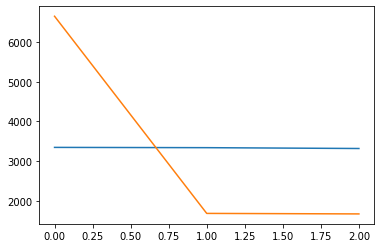

In [221]:
# we will use the library matplotlib to make plots

import matplotlib.pyplot as plt

plt.plot(guessed_counts)
plt.plot(remaining_counts)

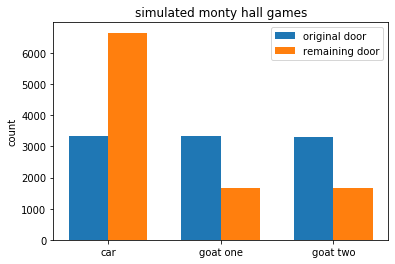

In [222]:
# here is a bar plots with appropriate labels etc.

x = np.arange(len(hidden_behind_doors))  # the label x-axis locations
width = 0.35  # the width of the bars

plt.figure()
plt.bar(x - width/2, guessed_counts, width, label='original door')
plt.bar(x + width/2, remaining_counts, width, label='remaining door')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('count')
plt.title('simulated monty hall games')
plt.xticks(ticks=x, labels=hidden_behind_doors)
plt.legend()
plt.show()